**1. Загрузка и проверка базы данных для работы**

In [1]:
from google.colab import files

# This will prompt you to upload the kaggle.json file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"denysdavydov","key":"b262de309f501ea650b9d8f78051408f"}'}

In [2]:
# Create the kaggle directory and move kaggle.json there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set the correct permissions
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# List the available datasets in the competition
!kaggle competitions files -c favorita-grocery-sales-forecasting

# Download the dataset
!kaggle competitions download -c favorita-grocery-sales-forecastingStep 5: Mount Google Drive

name                       size  creationDate         
------------------------  -----  -------------------  
holidays_events.csv.7z      2KB  2018-06-20 06:10:54  
stores.csv.7z              648B  2018-06-20 06:10:54  
items.csv.7z               14KB  2018-06-20 06:10:54  
test.csv.7z                 5MB  2018-06-20 06:10:54  
oil.csv.7z                  4KB  2018-06-20 06:10:54  
sample_submission.csv.7z  651KB  2018-06-20 06:10:54  
transactions.csv.7z       214KB  2018-06-20 06:10:54  
train.csv.7z              452MB  2018-06-20 06:10:54  
usage: kaggle [-h] [-v] [-W] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: unrecognized arguments: Mount Google Drive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!mkdir -p /content/drive/MyDrive/retail_kaggle_data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Unzip the downloaded dataset
!unzip /content/drive/MyDrive/retail_kaggle_data/favorita-grocery-sales-forecasting.zip

Archive:  /content/drive/MyDrive/retail_kaggle_data/favorita-grocery-sales-forecasting.zip
  inflating: holidays_events.csv.7z  
  inflating: items.csv.7z            
  inflating: oil.csv.7z              
  inflating: sample_submission.csv.7z  
  inflating: stores.csv.7z           
  inflating: test.csv.7z             
  inflating: train.csv.7z            
  inflating: transactions.csv.7z     


In [8]:
!apt-get install -y p7zip-full

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [9]:
!7z e train.csv.7z
!7z e stores.csv.7z
!7z e items.csv.7z
!7z e holidays_events.csv.7z
!7z e oil.csv.7z
!7z e transactions.csv.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 474092593 bytes (453 MiB)

Extracting archive: train.csv.7z
--
Path = train.csv.7z
Type = 7z
Physical Size = 474092593
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      0% - train.csv                  1% - train.csv                  2% - train.csv                  3% - train.csv                  4% - train.csv                  5% - train.csv                  6% - train.csv                  7% - train.csv                  8% - train.csv

In [10]:
import pandas as pd

# Load the CSV files into pandas DataFrames
df_items = pd.read_csv('items.csv')

In [11]:
df_items.head(5)

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [12]:
!cp *.csv /content/drive/MyDrive/retail_kaggle_data/.

In [14]:
import pandas as pd
# Load the CSV files into pandas DataFrames
df_stores = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/stores.csv')
df_items = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/items.csv')
df_transactions = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/transactions.csv')
df_oil = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/oil.csv')
df_holidays_events = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/holidays_events.csv')

#Note: train file is very large.
#To make sure we fit RAM avaible on Google-Colab, we will load only part of the file
df_train = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/train.csv', nrows=2e7)

In [15]:
#Select list of stores located in the 'Guayas' region
store_ids = df_stores[df_stores['state'] == 'Guayas']['store_nbr'].unique()

# Initialize an empty list to hold filtered chunks
filtered_chunks = []

# Define the chunk size (number of rows per chunk)
chunk_size = 10 ** 6  # Adjust based on your system's memory capacity

# Read the CSV file in chunks
for chunk in pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/train.csv', chunksize=chunk_size):
    # Filter the chunk for the desired store IDs
    chunk_filtered = chunk[chunk['store_nbr'].isin(store_ids)]
    # Append the filtered chunk to the list
    filtered_chunks.append(chunk_filtered)
    # Optional: Delete the chunk to free up memory
    del chunk

# Concatenate all filtered chunks into a single DataFrame
df_train = pd.concat(filtered_chunks, ignore_index=True)

# Clean up to free memory
del filtered_chunks

<ipython-input-15-d5d9bbc492a4>:11: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/train.csv', chunksize=chunk_size):


In [19]:
# Check the size of the filtered dataset
print(f"Filtered dataset size: {df_train.shape}")

# Preview the first few rows
print(df_train.head())

Filtered dataset size: (22941656, 6)
      id        date  store_nbr  item_nbr  unit_sales onpromotion
0  18789  2013-01-02         24    103665         6.0         NaN
1  18790  2013-01-02         24    105574        12.0         NaN
2  18791  2013-01-02         24    105575         2.0         NaN
3  18792  2013-01-02         24    105577         1.0         NaN
4  18793  2013-01-02         24    105693         7.0         NaN


Проверка пропущенных значений

In [20]:
print(df_train.isnull().sum())

id                   0
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
onpromotion    3980341
dtype: int64


удаление пропущеных значений с учетом, что если значение пропущено, то скидки не было

In [21]:
df_train['onpromotion'] = df_train['onpromotion'].fillna(False)
print("Missing values in 'onpromotion' have been filled.")

Missing values in 'onpromotion' have been filled.


<ipython-input-21-a6662784b68e>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['onpromotion'] = df_train['onpromotion'].fillna(False)


In [22]:
print(df_train.isnull().sum())

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
dtype: int64


Анализ распределения unit_sales

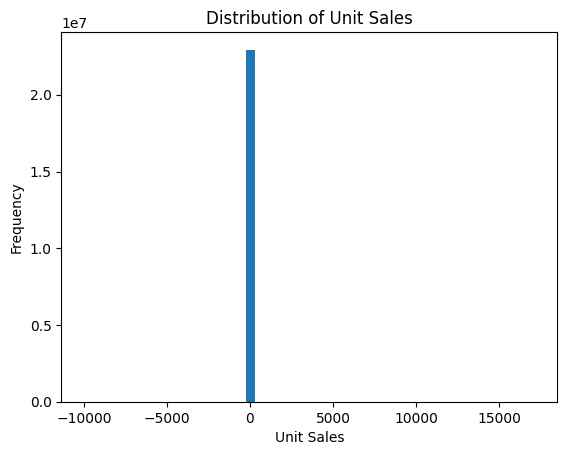

In [24]:
import matplotlib.pyplot as plt
# Distribution plot for unit_sales
df_train['unit_sales'].plot(kind='hist', bins=50, title='Distribution of Unit Sales')
plt.xlabel('Unit Sales')
plt.show()

Проверим отрицательные значения

In [25]:
negative_sales = df_train[df_train['unit_sales'] < 0]
print(f"Number of negative unit sales: {negative_sales.shape[0]}")
print(negative_sales.head())

Number of negative unit sales: 1322
           id        date  store_nbr  item_nbr  unit_sales  onpromotion
18589  106658  2013-01-04         34    586824        -2.0        False
54236  309805  2013-01-09         35   1079215        -8.0        False
64452  382905  2013-01-11         27   1097187       -20.0        False
87113  507901  2013-01-14         30    959437       -34.0        False
93833  547212  2013-01-15         30    812751      -168.0        False


In [26]:
# Remove rows with negative unit_sales
df_train = df_train[df_train['unit_sales'] >= 0]
print(f"Dataset size after removing negative sales: {df_train.shape}")

Dataset size after removing negative sales: (22940334, 6)


Удалить выбросы

In [27]:
# Calculate 1st and 99th percentiles
percentiles = df_train['unit_sales'].quantile([0.01, 0.99])
print(f"1st percentile: {percentiles[0.01]}, 99th percentile: {percentiles[0.99]}")

# Filter the data to remove outliers
df_train = df_train[
    (df_train['unit_sales'] >= percentiles[0.01]) &
    (df_train['unit_sales'] <= percentiles[0.99])
]
print(f"Dataset size after removing outliers: {df_train.shape}")

1st percentile: 1.0, 99th percentile: 60.0
Dataset size after removing outliers: (22610607, 6)


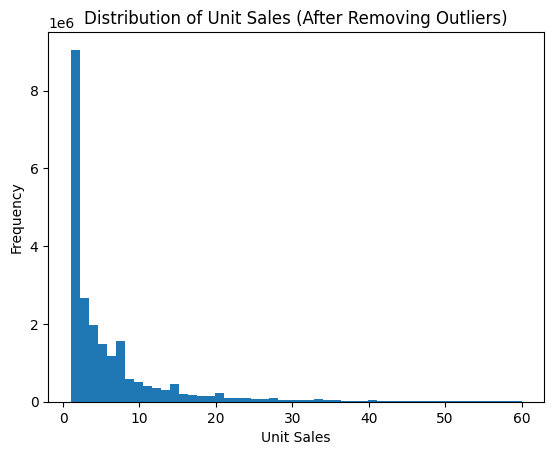

In [28]:
# Distribution plot after removing outliers
df_train['unit_sales'].plot(kind='hist', bins=50, title='Distribution of Unit Sales (After Removing Outliers)')
plt.xlabel('Unit Sales')
plt.show()

Продажи во времени

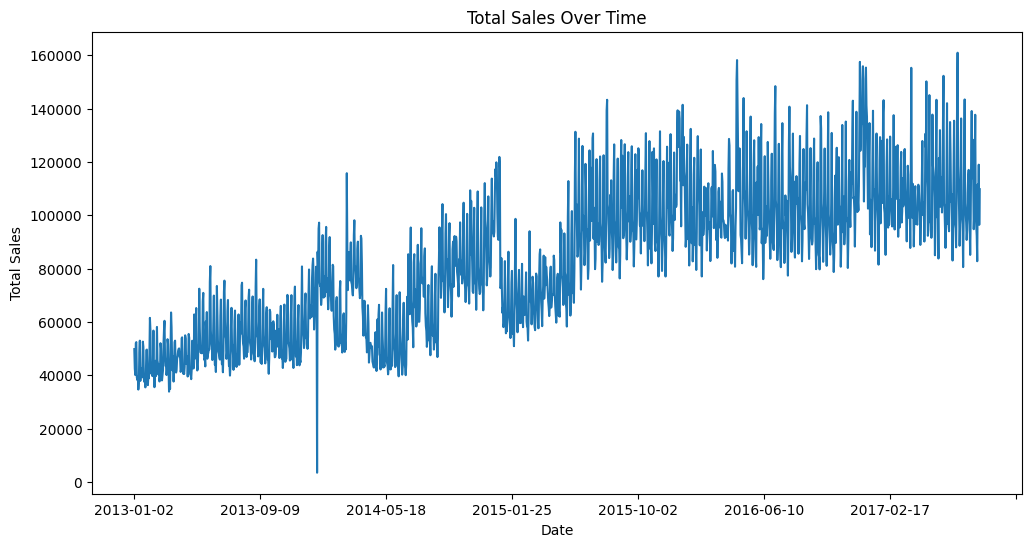

In [29]:
# Group by date and calculate total sales
sales_over_time = df_train.groupby('date')['unit_sales'].sum()

# Plot total sales over time
plt.figure(figsize=(12, 6))
sales_over_time.plot(title='Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

Продажи по месяцам

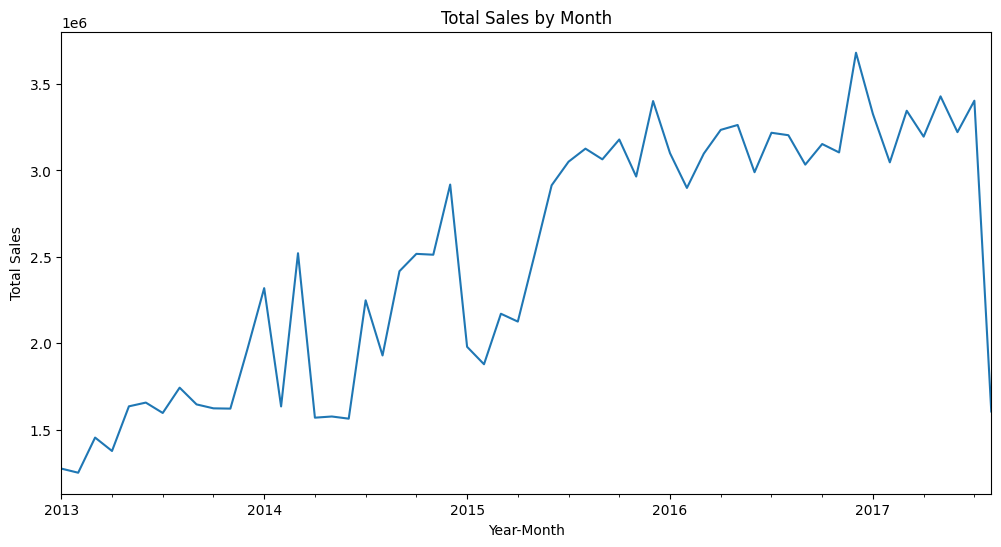

In [30]:
# Convert the 'date' column to datetime format (если это еще не сделано)
df_train['date'] = pd.to_datetime(df_train['date'])

# Add a column for year-month
df_train['year_month'] = df_train['date'].dt.to_period('M')

# Group by year-month and calculate total sales
monthly_sales = df_train.groupby('year_month')['unit_sales'].sum()

# Plot monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Total Sales by Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.show()

Продажи для отдельного магазина

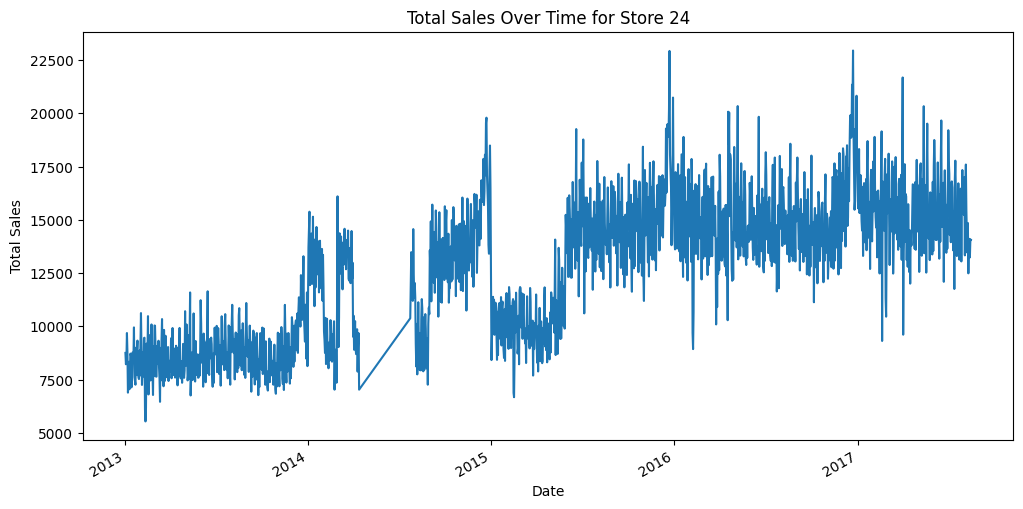

In [31]:
# Filter data for store 24
store_24_data = df_train[df_train['store_nbr'] == 24]

# Group by date and calculate total sales
store_24_sales = store_24_data.groupby('date')['unit_sales'].sum()

# Plot sales for store 24
plt.figure(figsize=(12, 6))
store_24_sales.plot(title='Total Sales Over Time for Store 24')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

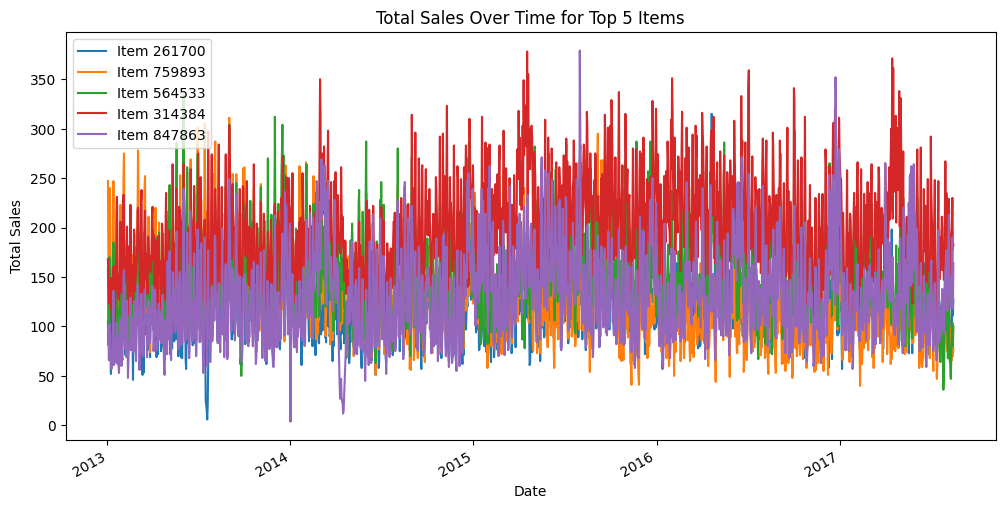

In [32]:
# Identify the top 5 items by sales frequency
top_items = df_train['item_nbr'].value_counts().head(5).index

# Plot the sales trend for each top item
plt.figure(figsize=(12, 6))
for item in top_items:
    # Filter data for the current item
    item_sales = df_train[df_train['item_nbr'] == item]
    # Group by date and calculate total sales
    sales_by_date_item = item_sales.groupby('date')['unit_sales'].sum()
    # Plot sales for this item
    sales_by_date_item.plot(label=f'Item {item}')

# Add title and labels
plt.title('Total Sales Over Time for Top 5 Items')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

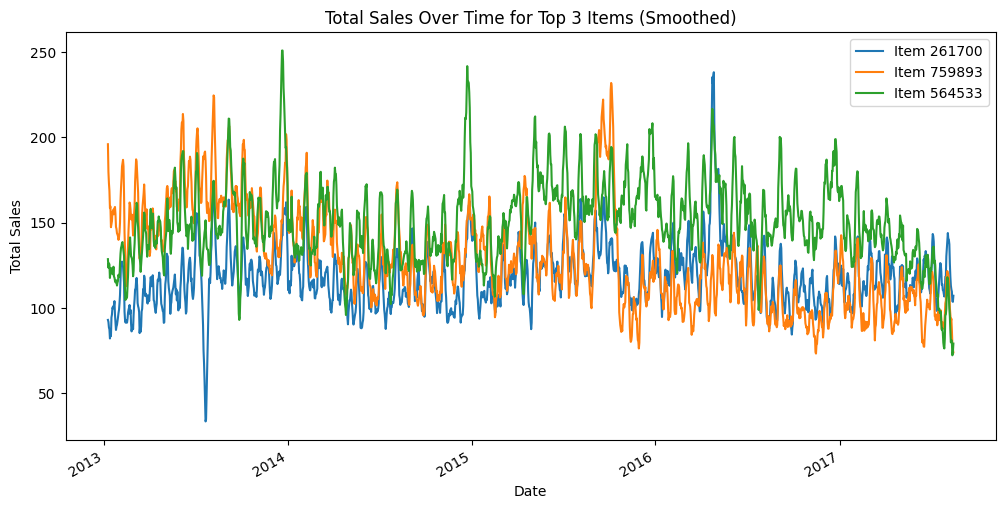

In [33]:
# Plot the sales trend for top 3 items with moving average
plt.figure(figsize=(12, 6))
for item in top_items[:3]:  # Limit to top 3 items for clarity
    # Filter data for the current item
    item_sales = df_train[df_train['item_nbr'] == item]
    # Group by date and calculate total sales
    sales_by_date_item = item_sales.groupby('date')['unit_sales'].sum()
    # Apply moving average
    sales_by_date_item = sales_by_date_item.rolling(window=7).mean()
    # Plot sales for this item
    sales_by_date_item.plot(label=f'Item {item}')

# Add title and labels
plt.title('Total Sales Over Time for Top 3 Items (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

**2 часть проекта.**
Анализ тренда с использованием линейной регрессии